In [73]:
import requests
import csv
import time
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://old.reddit.com/r/popular/"
headers = {'User-Agent': 'Mozilla/5.0'}
# Returns a requests.models.Response object
page = requests.get(url, headers=headers)


In [74]:
soup = BeautifulSoup(page.text, 'html.parser')
posts = soup.find_all("div", class_="thing")
counter=1
post_lines=[]
heading='Test'
comments='10'
votes='10'
author='Test'
timestamp='10'
postsin5hrs='yes'

In [75]:
while (counter<100):
    for post in posts:
        if(post.find('a', class_="title")!=None):
            heading=post.find('a', class_="title").text.encode("utf-8")
        if(post.find('a', class_="comments")!=None):
            comments=post.find('a', class_="comments").text.split()[0]
#             print comments
        if (post.find('div', class_="score unvoted")!=None):
            votes=post.find('div', class_="score unvoted").text.split('k')[0]
        if (post.find('a', class_="author") !=None):
            author=post.find('a', class_="author").text.encode("utf-8")
        if (post.find('time', class_="live-timestamp") !=None):
            timestamp=post.find('time', class_="live-timestamp").text.split(' ')[0]

            if(int(timestamp)<=5):
                postsin5hrs='yes'
            else:
                postsin5hrs='no'
        counter+=1
        post_lines.append([heading, author, comments, float(votes), timestamp, postsin5hrs])

In [76]:
with open('output1.csv', 'w') as f:
    for post in post_lines:

        writer = csv.writer(f)
        writer.writerow(post)


    next_button = soup.find("span", class_="next-button")
    next_page_link = next_button.find("a").attrs['href']
    time.sleep(2)
    page = requests.get(next_page_link, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

In [77]:
df = pd.read_csv('output1.csv',names=['heading','author','comments','votes','timestamp','postsin5hrs'])

# df.comments=df.comments.astype(int)
# df.votes=df.votes.astype(int)

In [78]:
print ('Author who commented maximum times')
groupedby_author=df.groupby('author',sort=False).sum()
groupedby_author.sort_index(ascending=False)
df1=groupedby_author.sort_values(by=['comments'], ascending=False).head(10)
print (df1)


Author who commented maximum times
                        comments    votes  timestamp
author                                              
b'yinyang107'              14576     92.8         52
b'slicky6'                  9680    210.4         24
b'madazzahatter'            7040    108.8         24
b'PersonalFinanceKid'       5968  23292.0         72
b'xPastelFox'               5152  20296.0         56
b'perfectdrivermusic'       4176    350.4         20
b'worriedaboutyungins'      3796  21180.0         60
b'bananabread5'             3148    104.0         20
b'jason_connor'             3140     93.2         12
b'pancaketoo'               2872  19860.0         56


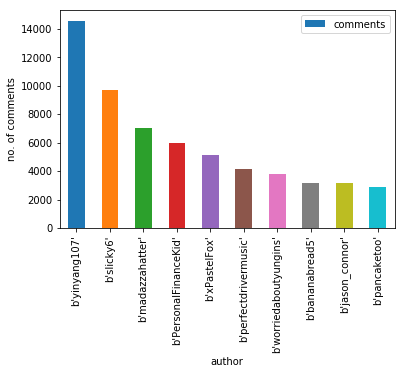

In [79]:
plt1=df1.plot(kind='bar',y='comments')
plt1.set_xlabel("author")
plt1.set_ylabel('no. of comments')
plt.savefig("MostCommentedAuthor.png")

In [80]:
print('Author whose posts received maximum votes')
# print(df)
subdf=df[['author','votes']].copy()
# print(subdf)
groupedby_author=subdf.groupby('author',sort=False).sum()
groupedby_author.sort_index(ascending=False)
# print (groupedby_author)
df1=groupedby_author.sort_values(by=['votes'], ascending=False).head(10)
print(df1)

Author whose posts received maximum votes
                          votes
author                         
b'junkfoodmama'         33092.0
b'topwrastler'          32520.0
b'pissdrunkasshole'     30612.0
b'PersonalFinanceKid'   23292.0
b'worriedaboutyungins'  21180.0
b'xPastelFox'           20296.0
b'pancaketoo'           19860.0
b'badgorillas'          18884.0
b'Makaveli_and_Cheese'  16344.0
b'wanderkitty82'         7832.0


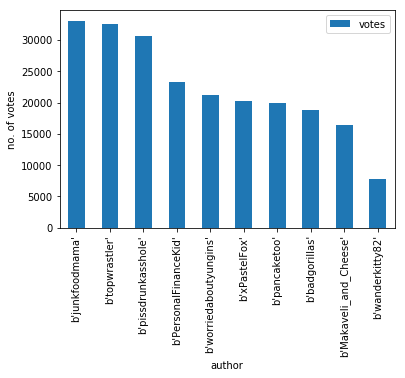

In [81]:
plt1=df1.plot(kind='bar')
plt1.set_xlabel("author")
plt1.set_ylabel('no. of votes')
plt.savefig("MostLikedAuthor.png")

Which Author has posted recently


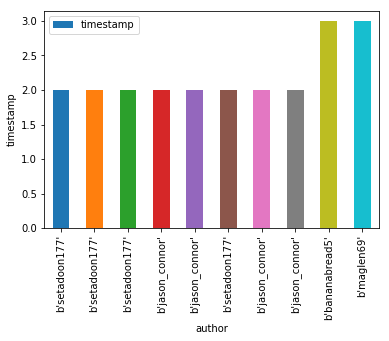

In [72]:
print('Which Author has posted recently')
# groupedby_author=df.groupby('author',sort=False).sum()
# groupedby_author.sort_index(ascending=False)
df1=df.sort_values(by=['timestamp'], ascending=True).head(10)
# print df1
plt1=df1.plot(kind='bar',x='author',y='timestamp')
plt1.set_xlabel("author")
plt1.set_ylabel('timestamp')
plt.savefig("MostRecentlyReceivedPosts.png")